# Notebook for calculating distance to stars    

In [1]:
import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
from astropy.io.votable import parse # Using the most beautiful package in Python ever. Astropy!


### We need to get the data somewhere. For this notebook, GAIA Space Observatory is used as an example. 
##### On this website --> https://gaia.ari.uni-heidelberg.de you can do a Cone Search with Pleiades (you can also use Right Ascencion and Declination) and 5 degrees radius.
###### This notebook was made based on this work but completely in Python https://www.cosmos.esa.int/web/gaia-users/archive/use-cases#ClusterAnalysisPythonTutorial

In [2]:
data = pd.read_csv('data_pleiades.csv', sep = ',', engine = 'python') # As you can see your data can be in gigabytes. Don't worry, you can select only the relevant columns before downloading on Gaia website to get a samller data

In [3]:
data.head()

,source_id,designation,ra,dec,l,b,ecl_lon,ecl_lat,parallax,pmra,...,phot_rp_mean_mag,ruwe,bp_g,bp_rp,dr2_radial_velocity,g_rp,phot_bp_mean_flux,phot_g_mean_flux,phot_rp_mean_flux,ref_epoch
0,166651396875092864,Gaia EDR3 166651396875092864,58.920424,27.519081,165.641518,-19.694180,62.531967,6.995169,-0.088015,0.266295,...,19.521332,0.954717,0.397663,0.914187,NaN,0.516523,91.455415,181.888278,123.204270,2016.0
1,166651401170412928,Gaia EDR3 166651401170412928,58.928664,27.509029,165.654472,-19.696569,62.537075,6.983823,1.446007,-5.478694,...,19.345644,1.043973,0.934671,1.878143,NaN,0.943472,44.248825,144.311404,144.844095,2016.0
2,166651603033526016,Gaia EDR3 166651603033526016,58.914135,27.525008,165.632894,-19.693634,62.527705,7.002122,0.551782,-0.382572,...,17.108050,0.935169,0.899340,1.770266,NaN,0.870926,383.787638,1211.592924,1137.465805,2016.0
3,166651603033526144,Gaia EDR3 166651603033526144,58.908045,27.525569,165.628285,-19.696899,62.522498,7.003788,0.917935,14.079366,...,18.347414,0.977711,1.286200,2.445606,NaN,1.159407,65.797423,296.632116,363.239038,2016.0
4,166651710408192128,Gaia EDR3 166651710408192128,58.906397,27.544882,165.613189,-19.683741,62.525086,7.022986,NaN,NaN,...,19.717533,NaN,0.642988,1.965712,NaN,1.322723,28.981371,72.251088,102.836018,2016.0


In [4]:
len(data) # number of lines 718270. We'll dig to find out where are the pleiades and calculate the distance to there.

718270

In [26]:
#just some parameters to make matplotlib beauty
plt.style.use('dark_background')
plt.rc('font', size = 15)
plt.figure(figsize = (10,8))


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

Saca só a quantidade de objetos no campo:

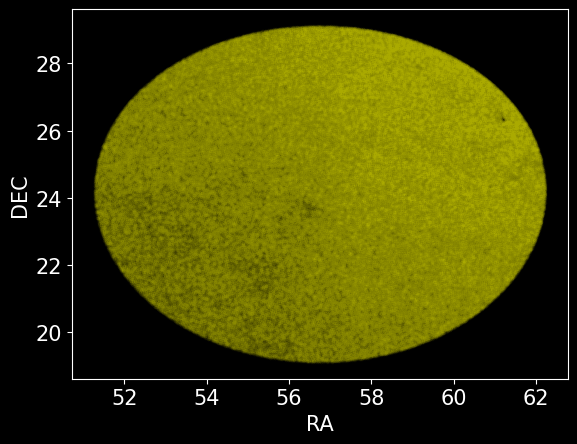

In [18]:
# plotting every object in the data by localizing their positions with Right Ascencion and Declination
plt.scatter(data['ra'], data['dec'], s = 5, alpha = 0.01, color = 'yellow')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.show()

# A cone projected on a 2-D plane. What does it look like?

In [8]:
# Ok, we need some astrophysics now
# Pleiades are a star cluster. They born together so we can assume that they all have the same distance, proper motions and magnitudes as a mean. 
# We can loc the data for "g_rp" < 0.6 which is the magnitude in Gaia photometric system.  The lower the magnitude value, the brighter the object.

#G−V=−0.02704+0.01424(Gbp−Grp)−0.2156(Gbp−Grp)2+0.01426(Gbp−Grp)3 <--- this is an equation to convert G magnitude to V magnitude system (which you propably know it by default reading magnitudes on Google). This equation is for EDR3 (Early Data Release 3)
# https://gea.esac.esa.int/archive/documentation/GEDR3/Data_processing/chap_cu5pho/cu5pho_sec_photSystem/cu5pho_ssec_photRelations.html
# For a complete understanding of Gaia Photometric System, I suggest starting here https://www.aanda.org/articles/aa/pdf/forth/aa43462-22.pdf
#-----------------------------------------
data_r = data.loc[data['g_rp'] < 0.6]
# you might want to play with 'g_rp' value until you find something different plotting below

In [9]:
len(data_r)

122382

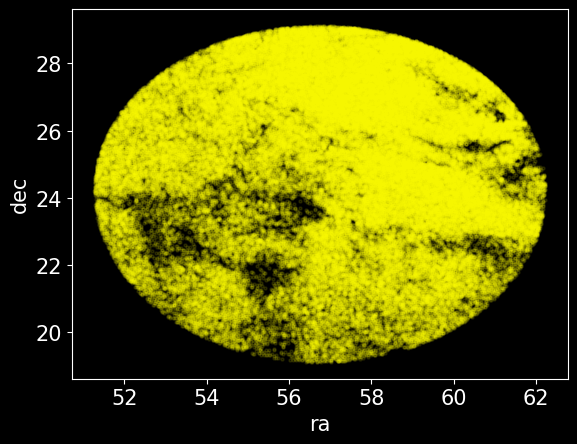

In [63]:
#plotting again to see what's happening
plt.scatter(data_r['ra'], data_r['dec'], s = 5, alpha = 0.1, color = 'yellow')
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()


### As you can nothing is making sense yet. But what about plotting proper motion RA and DEC? We used ra and dec above which is just the objects positions. If one plots proper motion one could look whether there's some group of objects moving together, right?

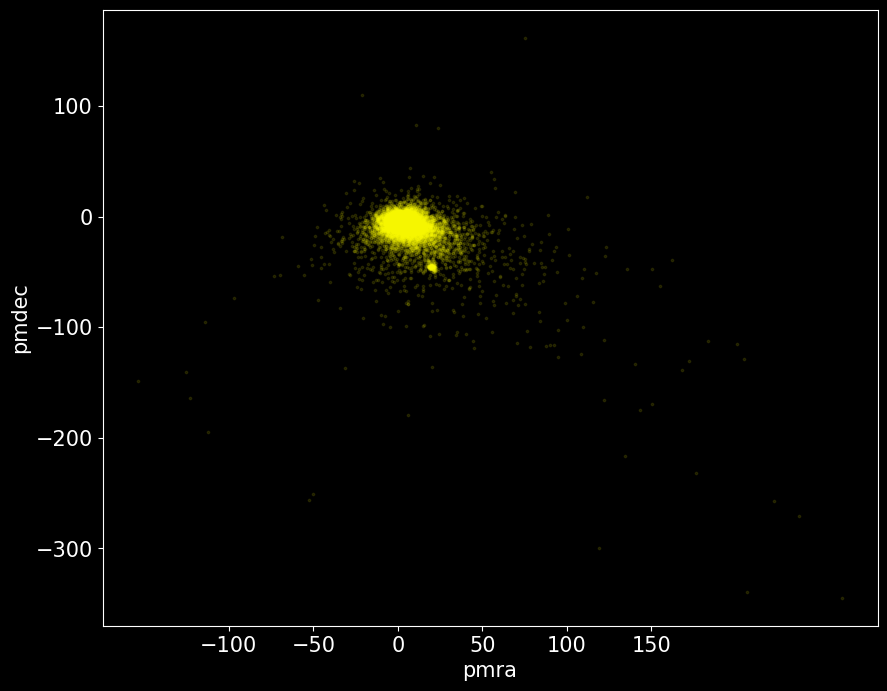

In [61]:
plt.figure(figsize = (10,8))
plt.xticks(np.arange(-100, 200, 50))
plt.scatter(data_r['pmra'], data_r['pmdec'], s = 3, alpha = 0.1, color = 'yellow') # now using proper motion ('pmra' and 'pmdec')
plt.xlabel('pmra')
plt.ylabel('pmdec')
plt.show()

#As you can see there's a group of objects that appears to be moving together!

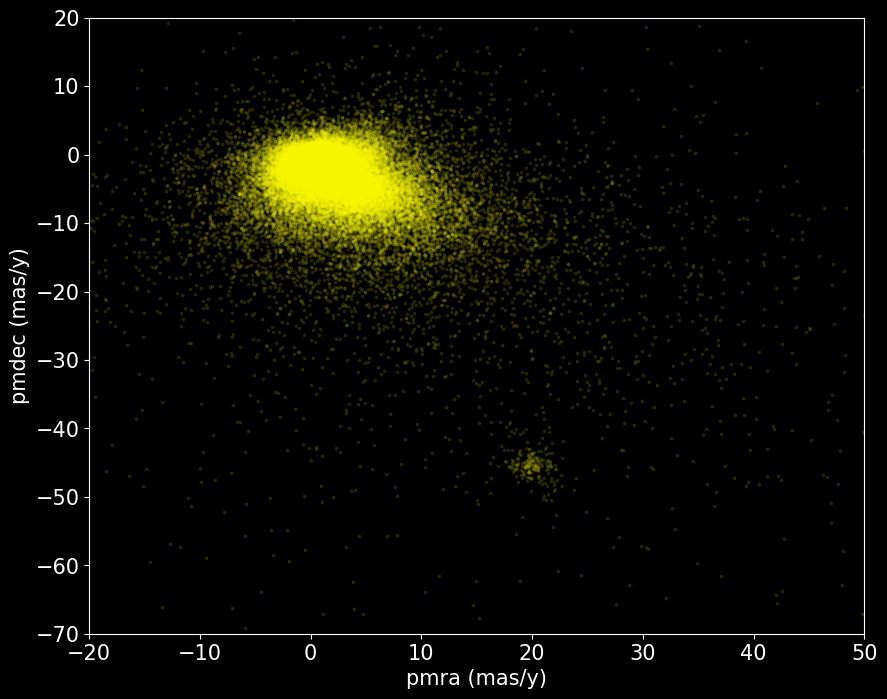

In [71]:
# ok, let's "zoom" this graph to look further, using xlim and ylim
plt.figure(figsize = (10,8))
plt.scatter(data_r['pmra'], data_r['pmdec'], s = 3, alpha = 0.1, color = 'yellow') # now using proper motion ('pmra' and 'pmdec')
plt.xlim(-20,50)
plt.ylim(-70,20)
plt.xlabel('pmra (mas/y)')
plt.ylabel('pmdec (mas/y)')
plt.show()


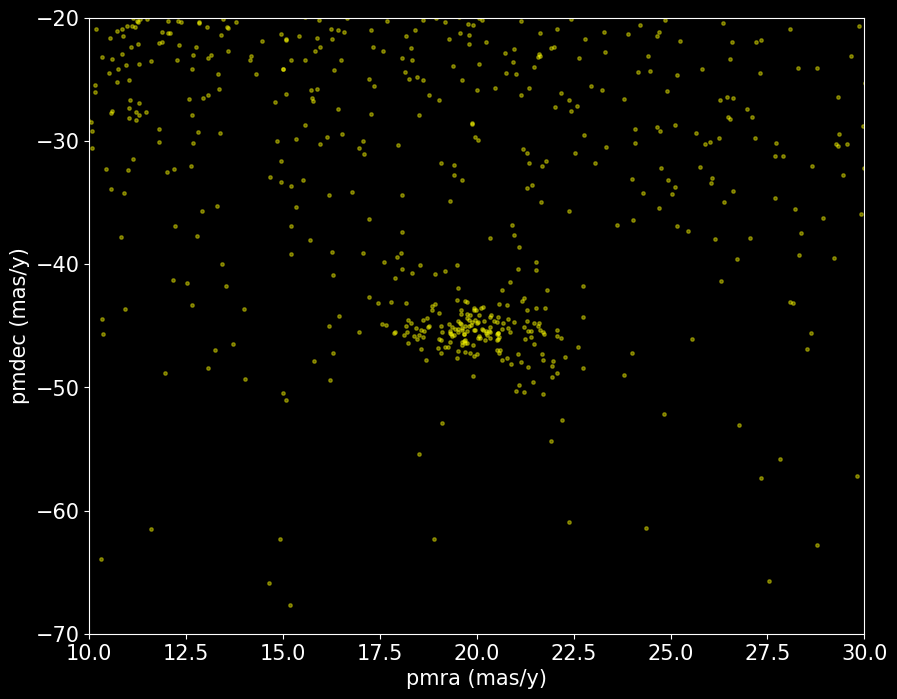

In [73]:
#just zooming again
plt.figure(figsize = (10,8))
plt.scatter(data_r['pmra'], data_r['pmdec'], s = 6, alpha = 0.4, color = 'yellow') # now using proper motion ('pmra' and 'pmdec')
plt.xlim(10,30)
plt.ylim(-70,-20)
plt.xlabel('pmra (mas/y)')
plt.ylabel('pmdec (mas/y)')
plt.show()

### Could we say that there's a bunch of objects between (17,23) along the x-axis and (-37,-55) y-axis? Remember that the units here are miliarcsecond per year! 

In [74]:
#Cutting the data again
comoving_objects = data.loc[data['pmra'] <= 23]
comoving_objects = comoving_objects.loc[comoving_objects['pmra'] >= 17]
comoving_objects = comoving_objects.loc[comoving_objects['pmdec'] <= -37]
comoving_objects = comoving_objects.loc[comoving_objects['pmdec'] >= -55]

### Now we need some statistics. We should plot a histogram with comoving_objects to see what's happening.
### Why? Because there's still too many objects. We want to distinguish the Pleiades from anything else. For this to happen, let's plot the parallax.

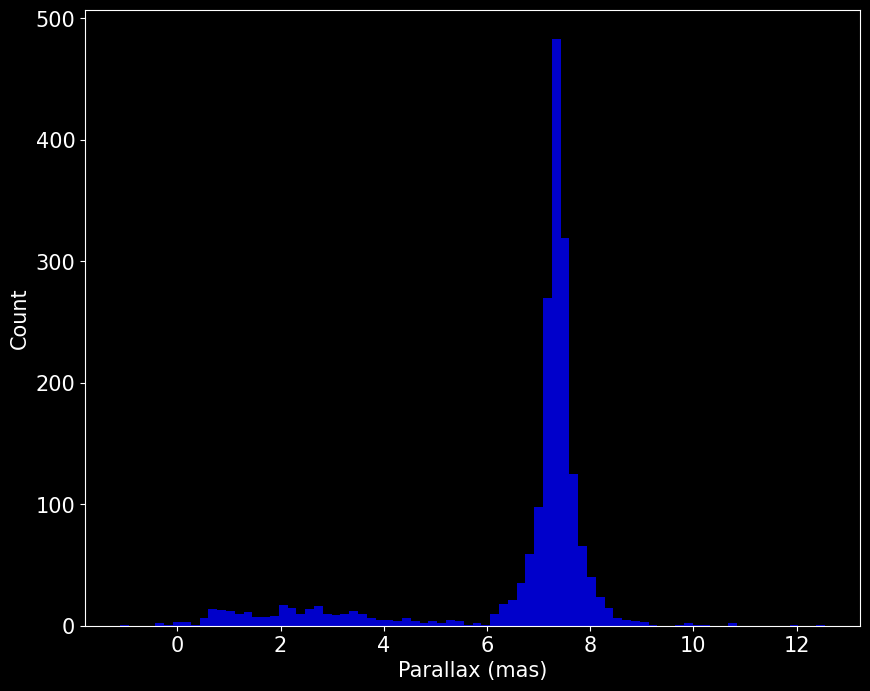

In [80]:
plt.figure(figsize = (10,8))
plt.hist(comoving_objects['parallax'], bins = 80, color = 'blue', alpha = 0.8)
plt.xlabel('Parallax (mas)')
plt.ylabel('Count')
plt.show()

#### The pleiades will be roughly at the same distance with some uncertantity. As you can see there's a large concentration around 7 milliarcsecond. We could slice this interval between 6 and 9 and do some basic statistics.

In [103]:
pleiades = comoving_objects.loc[comoving_objects['parallax'] <= 9.0]
pleiades = pleiades.loc[pleiades['parallax'] >= 6.0]

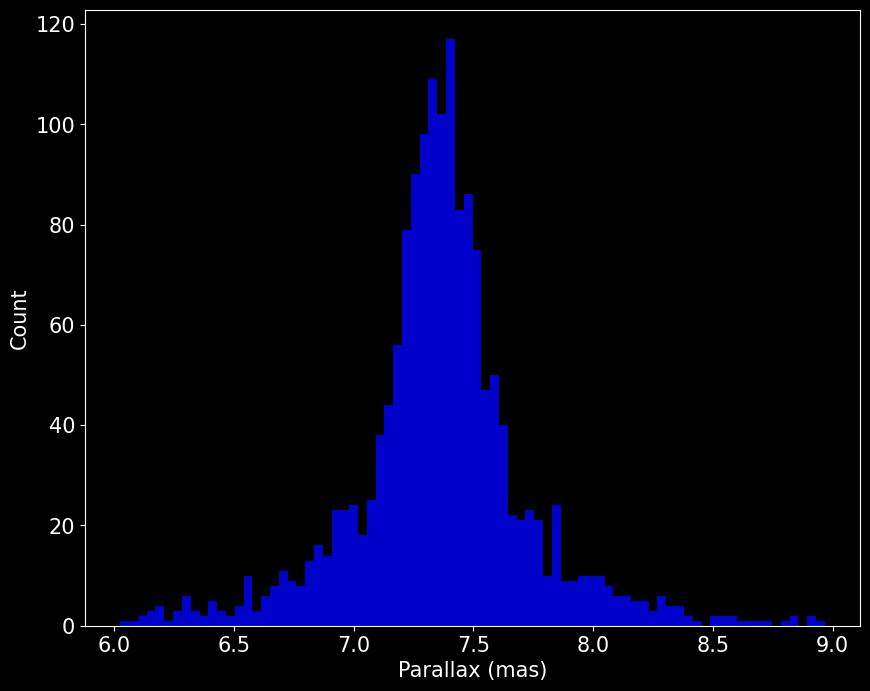

In [104]:
#plotting again
plt.figure(figsize = (10,8))
plt.hist(pleiades['parallax'], bins = 80, color = 'blue', alpha = 0.8)
plt.xlabel('Parallax (mas)')
plt.ylabel('Count')
plt.show()

#### Now, we compute using the parallax mean $$ d = \frac{1}{p} $$ 

In [105]:
pleiades_distance_parsec = (1 * 1000) / (np.mean(pleiades['parallax'])) 
# Here i'm just expliciting showing that the above equation needs to 
# be multiplied by 1,000 because our parallax is in milliarcsecond and we want parsec not parmilliarcsec
pleiades_distance_parsec


135.80960100048853

This is it! Pleiades are roughly 135.8 parsecs from us.
If one wants to convert to light-year one just need to multiply to 3.26

In [96]:
pleiades_distance_lightyear = pleiades_distance_parsec*3.26
pleiades_distance_lightyear

442.7392992615926

#### Wait! There's more. Remember all measurements have inherent uncertainty


In [98]:
pleiades_paralaxe_err = np.std(pleiades['parallax'])
pleiades_paralaxe_err

0.36914787955697426

#### Now we need to propagate the uncertainty

$$ d = \frac{1}{p} $$ 
$$ \sigma_d = \sqrt{\left(\frac{\partial d}{\partial p} \sigma_p \right)^{\!\!2}} $$
$$ = \frac{1}{p^2} \: \sigma_p$$


#### Again, do not forget multiplying by 1,000 because we want parsec

In [111]:
pleiades_parsecs_err = (1000*pleiades_paralaxe_err/(np.mean(pleiades['parallax'])**2))
print(pleiades_parsecs_err,'parsecs uncertainty')
print (pleiades_parsecs_err * 3.26, 'light-year uncertainty')

6.808654937305625 parsecs uncertainty
22.196215095616335 light-year uncertainty


#### Pleiades distance:
 $$ (135.8 \pm 6.8) \:\text{pc} $$ 
$$ (442.7 \pm 22.2) \: \text{ly} $$

#### Comparison with Wikipedia data

<img src="pleiadeswiki.png" alt="pleaides" width="500"/>